# DB Project, data prep #1

## Feature Generation, Data Merging

In [1]:
# Importing relevant packages, loading relevant data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

crime_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/Crimes_-_2015_to_Present.csv')
crime_class_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/Crimes_classes.csv')
beats_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/beats.csv')
weather_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/weather_2015-2020.csv')

In [2]:
# Transforming crime data to datetime, indexing by such, limiting data to 2015-2020.

crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df = crime_df.set_index('Date')
crime_df = crime_df['20150101' : '20201231']

In [3]:
# Creating features for month, week of the current year, day of the week, and hour of day .

crime_df['Month'] = crime_df.index.month
crime_df['Week'] = crime_df.index.week
crime_df['Day'] = crime_df.index.day
crime_df['Hour'] = crime_df.index.hour

def find_watch(n):
    if 0 <= n < 8:
        return 'First'
    elif 8 <= n < 16:
        return 'Second'
    elif 16 <= n:
        return 'Third'
        

crime_df['Watch'] = crime_df['Hour'].apply(find_watch)

crime_df.index = crime_df.index.date

In [4]:
# Dropping non-criminal reports

crime_df = crime_df[~crime_df['IUCR'].isin(['5073', '5093', '5094', '5113', '5114'])]

In [5]:
# Transforming weather data to datetime, indexing by such.

weather_df['Date'] = pd.to_datetime(weather_df['DATE'])
weather_df = weather_df.set_index('Date')

In [6]:
# Merging weather data to crime data.

crime_df = pd.merge(crime_df, weather_df, how = 'left', left_index = True, right_index = True)

In [7]:
# Preparing crime classes to merge into crime data, and merging.

for index, row in crime_class_df.iterrows():
    if len(row['crime_id']) == 3:
        row['crime_id'] = '0' + row['crime_id']

crime_df = pd.merge(crime_df, crime_class_df, how = 'left', left_on = 'IUCR', right_on = 'crime_id')        

In [8]:
# Merging beat data to crime data.  

crime_df = pd.merge(crime_df, beats_df, how = 'left', left_on = 'Beat', right_on = 'beat_num')

In [9]:
# Dropping undesired features.

col_list = ['ID','Arrest', 'Domestic', 'Beat', 'Year', 'Month', 'Week', 'Day', 'Hour', 'Watch', 
            'PRCP', 'SNOW','TMAX', 'TMIN', 'category_1', 'category_2', 'count_l_stops', 
            'count_bus_stops', 'count_metra_stops', 'count_restaurants', 'count_bars', 
            'count_daycares', 'count_entertainment', 'count_businesses', 'road_distance_ft', 
            'TOTAL POPULATION', 'dist_to_police', 'dist_to_hospital']

df = crime_df.filter(col_list)

## Data Exploration

In [10]:
# Describing data shape.

df.shape

(1542404, 28)

In [11]:
# Pulling random data point.

df.iloc[1200400]

ID                         11783289
Arrest                        False
Domestic                      False
Beat                            811
Year                           2019
Month                             7
Week                             27
Day                               4
Hour                              3
Watch                         First
PRCP                            0.0
SNOW                            0.0
TMAX                             91
TMIN                             70
category_1                  type II
category_2                      NaN
count_l_stops                   0.0
count_bus_stops                68.0
count_metra_stops               0.0
count_restaurants              63.0
count_bars                     20.0
count_daycares                  4.0
count_entertainment             2.0
count_businesses              139.0
road_distance_ft           1.245629
TOTAL POPULATION       22122.914655
dist_to_police             0.074246
dist_to_hospital           0

In [12]:
# Pulling first 5 rows.

df.head()

,ID,Arrest,Domestic,Beat,Year,Month,Week,Day,Hour,Watch,...,count_metra_stops,count_restaurants,count_bars,count_daycares,count_entertainment,count_businesses,road_distance_ft,TOTAL POPULATION,dist_to_police,dist_to_hospital
0,10225520,False,False,411,2015,1,1,1,0,First,...,2.0,16.0,0.0,1.0,0.0,58.0,0.707356,5470.665210,0.022253,0.008498
1,11028448,True,True,1532,2015,1,1,1,0,First,...,0.0,14.0,2.0,1.0,0.0,24.0,0.516070,6459.881345,0.019838,0.020157
2,10225760,False,False,2024,2015,1,1,1,0,First,...,0.0,36.0,7.0,2.0,0.0,50.0,0.276870,11195.685959,0.025316,0.002818
3,11242929,False,False,223,2015,1,1,1,0,First,...,0.0,21.0,3.0,0.0,1.0,30.0,0.424687,7269.595565,0.020448,0.004761
4,10229179,False,False,214,2015,1,1,1,0,First,...,0.0,11.0,2.0,2.0,2.0,48.0,0.592841,6796.786889,0.020608,0.019376


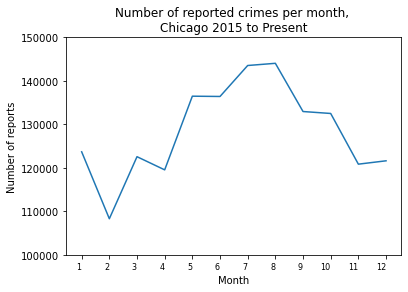

In [13]:
# Crime Count by month (5 year aggregate).

month_counts = df.groupby(by = [df.Month]).count()

month_counts['ID'].plot(kind='line')
plt.xticks(month_counts.index, rotation=0, size=8, ha='right')
plt.xlabel('Month')
plt.ylabel('Number of reports')
plt.ylim((100000,150000))
plt.title('Number of reported crimes per month, \nChicago 2015 to Present')
plt.show()

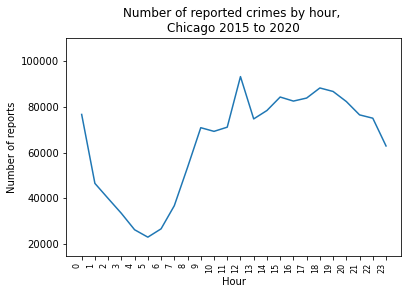

In [14]:
# Crime Count by time of day (5 year aggregate).

hour_counts = df.groupby(by = [df.Hour]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(hour_counts.index, rotation=90, size=8, ha='right')
plt.xlabel('Hour')
plt.ylabel('Number of reports')
plt.ylim((15000,110000))
plt.title('Number of reported crimes by hour, \nChicago 2015 to 2020')
plt.show()

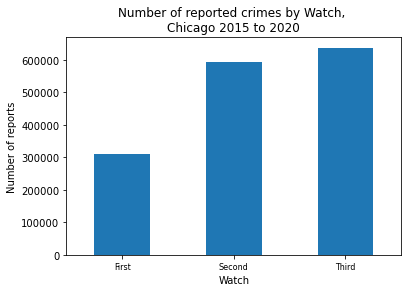

In [98]:
 # Crime Count by watch/shift (5 year aggregate).

watch_counts = df.groupby(by = [df.Watch]).count()

watch_counts['ID'].plot(kind='bar')
plt.xticks(rotation=0, size=8, ha='center')
plt.xlabel('Watch')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Watch, \nChicago 2015 to 2020')
plt.show()

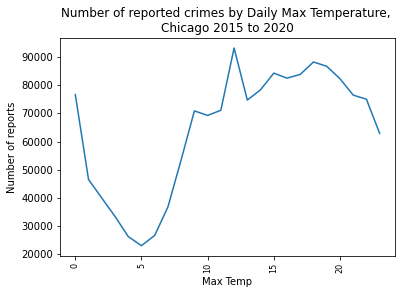

In [16]:
# Crime Count by maximum daily temperature (5 year aggregate).

temp_counts = df.groupby(by = [df.TMAX]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='center')
plt.xlabel('Max Temp')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Daily Max Temperature, \nChicago 2015 to 2020')
plt.show()

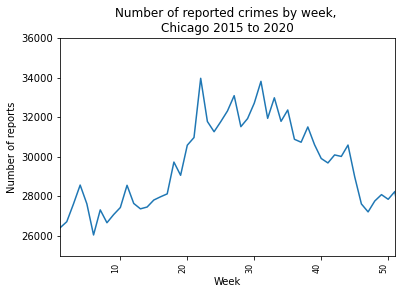

In [17]:
# Crime Count by week (5 year aggregate).

week_counts = df.groupby(by = [df.Week]).count()

week_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='right')
plt.xlabel('Week')
plt.ylabel('Number of reports')
plt.ylim((25000,36000))
plt.xlim((1,51))
plt.title('Number of reported crimes by week, \nChicago 2015 to 2020')
plt.show()

In [18]:
#Number of week/watch counts for a two-year period for a given beat.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Beat', 'Week', 'Watch']).count()
print ('Week/ Watch max count:', week_watch_count['ID'].max())
print ('Week/ Watch min count:', week_watch_count['ID'].min())
print ('Week/ Watch median:', week_watch_count['ID'].median())


Week/ Watch max count: 355
Week/ Watch min count: 1
Week/ Watch median: 11.0


In [19]:
#Number of month/hour counts for a two-year period for a given beat.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Beat','Month', 'Hour']).count()
print ('Month/ Hour max count:', week_watch_count['ID'].max())
print ('Month/ Hour min count:', week_watch_count['ID'].min())
print ('Month/ Hour median:', week_watch_count['ID'].median())

Month/ Hour max count: 86
Month/ Hour min count: 1
Month/ Hour median: 6.0


In [29]:
#Number of month/watch counts for a two-year period for a given beat.

month_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Beat','Month', 'Watch']).count()
print ('Month/ Watch max count:', month_watch_count['ID'].max())
print ('Month/ Watch min count:', month_watch_count['ID'].min())
print ('Month/ Watch median:', month_watch_count['ID'].median())

Month/ Watch max count: 433
Month/ Watch min count: 1
Month/ Watch median: 49.0


## Graphing changes in data over time

### Change in total crime reports year over year, by Month

(11000.0, 27000.0)

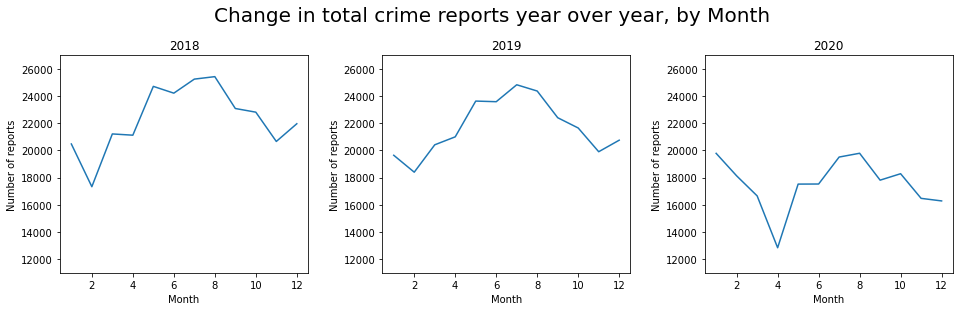

In [272]:
f, axes = plt.subplots(1,3, figsize=(16, 4))
f.subplots_adjust(wspace=0.3, hspace=2)
f.suptitle('Change in total crime reports year over year, by Month', y=1.05,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Month]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Month]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Month]).count()

df_2018['ID'].plot(kind='line', ax = axes[0])
df_2019['ID'].plot(kind='line', ax = axes[1])
df_2020['ID'].plot(kind='line', ax = axes[2])

axes[0].set_ylabel('Number of reports')
axes[0].set_xlabel('Month')
axes[0].set_title('2018')
axes[0].set_ylim(11000, 27000)
axes[1].set_ylabel('Number of reports')
axes[1].set_xlabel('Month')
axes[1].set_title('2019')
axes[1].set_ylim(11000, 27000)
axes[2].set_ylabel('Number of reports')
axes[2].set_xlabel('Month')
axes[2].set_title('2020')
axes[2].set_ylim(11000, 27000)

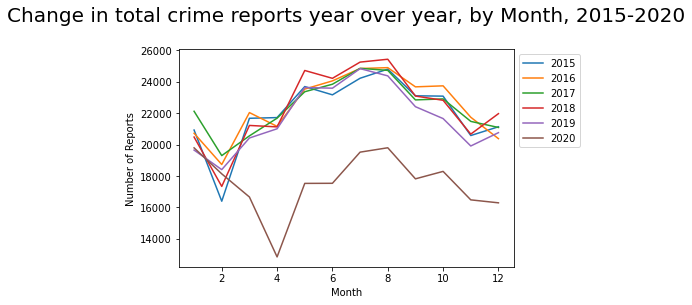

In [360]:
plt.title('Change in total crime reports year over year, by Month, 2015-2020', y=1.1,  fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Reports')

df_2015 = df[df['Year'] == 2015].groupby(by = [df.Month]).count()
df_2016 = df[df['Year'] == 2016].groupby(by = [df.Month]).count()
df_2017 = df[df['Year'] == 2017].groupby(by = [df.Month]).count()
df_2018 = df[df['Year'] == 2018].groupby(by = [df.Month]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Month]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Month]).count()

df_2015['ID'].plot(kind='line')
df_2016['ID'].plot(kind='line')
df_2017['ID'].plot(kind='line')
df_2018['ID'].plot(kind='line')
df_2019['ID'].plot(kind='line')
df_2020['ID'].plot(kind='line')

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], bbox_to_anchor=(1, 1))

### Change in total crime reports year over year, by Week

(2500.0, 7000.0)

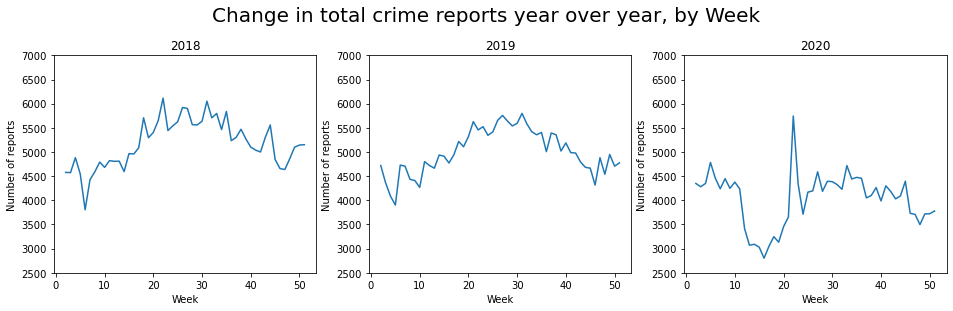

In [273]:
f, axes = plt.subplots(1,3, figsize=(16, 4))
f.subplots_adjust(wspace=0.2, hspace=2)
f.suptitle('Change in total crime reports year over year, by Week', y=1.05,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Week]).count()[1:51]
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Week]).count()[1:51]
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Week]).count()[1:51]

df_2018['ID'].plot(kind='line', ax = axes[0])
df_2019['ID'].plot(kind='line', ax = axes[1])
df_2020['ID'].plot(kind='line', ax = axes[2])

axes[0].set_ylabel('Number of reports')
axes[0].set_xlabel('Week')
axes[0].set_title('2018')
axes[0].set_ylim(2500, 7000)
axes[1].set_ylabel('Number of reports')
axes[1].set_xlabel('Week')
axes[1].set_title('2019')
axes[1].set_ylim(2500, 7000)
axes[2].set_ylabel('Number of reports')
axes[2].set_xlabel('Week')
axes[2].set_title('2020')
axes[2].set_ylim(2500, 7000)

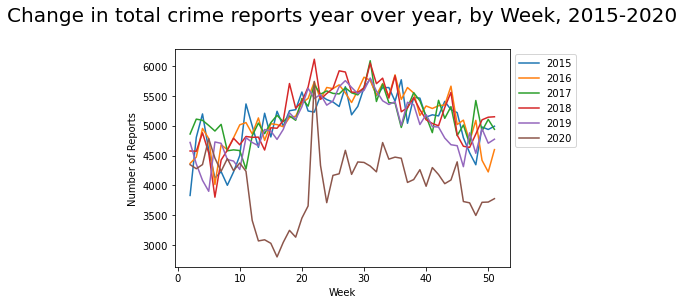

In [361]:
plt.title('Change in total crime reports year over year, by Week, 2015-2020', y=1.1,  fontsize=20)
plt.xlabel('Week')
plt.ylabel('Number of Reports')

df_2015 = df[df['Year'] == 2015].groupby(by = [df.Week]).count()[1:51]
df_2016 = df[df['Year'] == 2016].groupby(by = [df.Week]).count()[1:51]
df_2017 = df[df['Year'] == 2017].groupby(by = [df.Week]).count()[1:51]
df_2018 = df[df['Year'] == 2018].groupby(by = [df.Week]).count()[1:51]
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Week]).count()[1:51]
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Week]).count()[1:51]

df_2015['ID'].plot(kind='line')
df_2016['ID'].plot(kind='line')
df_2017['ID'].plot(kind='line')
df_2018['ID'].plot(kind='line')
df_2019['ID'].plot(kind='line')
df_2020['ID'].plot(kind='line')

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], bbox_to_anchor=(1, 1))

### Change in total crime reports year over year, by Hour

(2000.0, 20000.0)

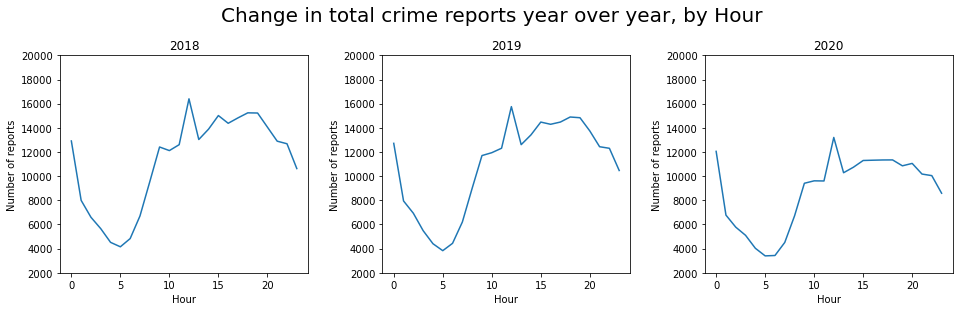

In [271]:
f, axes = plt.subplots(1,3, figsize=(16, 4))
f.subplots_adjust(wspace=0.3, hspace=2)
f.suptitle('Change in total crime reports year over year, by Hour', y=1.05,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Hour]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Hour]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Hour]).count()

df_2018['ID'].plot(kind='line', ax = axes[0])
df_2019['ID'].plot(kind='line', ax = axes[1])
df_2020['ID'].plot(kind='line', ax = axes[2])

axes[0].set_ylabel('Number of reports')
axes[0].set_xlabel('Hour')
axes[0].set_title('2018')
axes[0].set_ylim(2000, 20000)
axes[1].set_ylabel('Number of reports')
axes[1].set_xlabel('Hour')
axes[1].set_title('2019')
axes[1].set_ylim(2000, 20000)
axes[2].set_ylabel('Number of reports')
axes[2].set_xlabel('Hour')
axes[2].set_title('2020')
axes[2].set_ylim(2000, 20000)

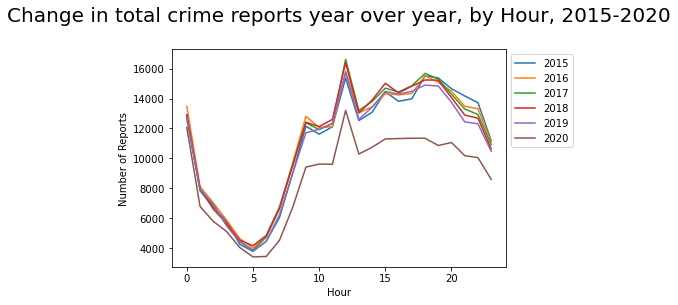

In [357]:
plt.title('Change in total crime reports year over year, by Hour, 2015-2020', y=1.1,  fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Number of Reports')

df_2015 = df[df['Year'] == 2015].groupby(by = [df.Hour]).count()
df_2016 = df[df['Year'] == 2016].groupby(by = [df.Hour]).count()
df_2017 = df[df['Year'] == 2017].groupby(by = [df.Hour]).count()
df_2018 = df[df['Year'] == 2018].groupby(by = [df.Hour]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Hour]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Hour]).count()

df_2015['ID'].plot(kind='line')
df_2016['ID'].plot(kind='line')
df_2017['ID'].plot(kind='line')
df_2018['ID'].plot(kind='line')
df_2019['ID'].plot(kind='line')
df_2020['ID'].plot(kind='line')

plt.legend([2015, 2016, 2017, 2018, 2019, 2020], bbox_to_anchor=(1, 1))

### Change in total crime reports year over year, by Watch

(0.0, 120000.0)

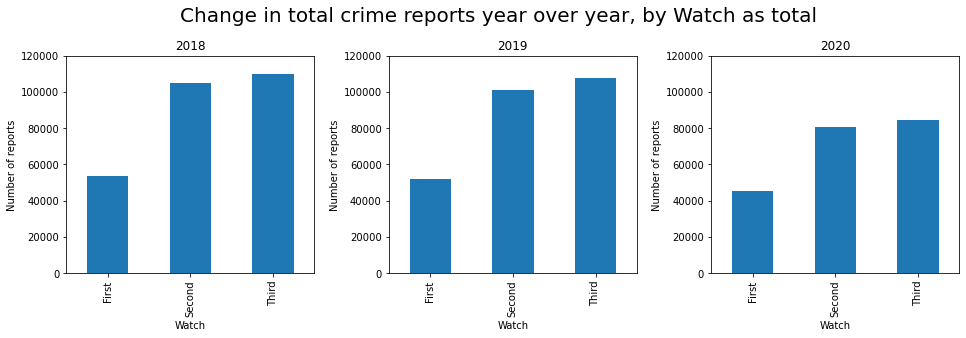

In [275]:
f, axes = plt.subplots(1,3, figsize=(16, 4))
f.subplots_adjust(wspace=0.3, hspace=2)
f.suptitle('Change in total crime reports year over year, by Watch as total', y=1.05,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Watch]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Watch]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Watch]).count()

df_2018['ID'].plot(kind='bar', ax = axes[0])
df_2019['ID'].plot(kind='bar', ax = axes[1])
df_2020['ID'].plot(kind='bar', ax = axes[2])

axes[0].set_ylabel('Number of reports')
axes[0].set_xlabel('Watch')
axes[0].set_title('2018')
axes[0].set_ylim(0, 120000)
axes[1].set_ylabel('Number of reports')
axes[1].set_xlabel('Watch')
axes[1].set_title('2019')
axes[1].set_ylim(0, 120000)
axes[2].set_ylabel('Number of reports')
axes[2].set_xlabel('Watch')
axes[2].set_title('2020')
axes[2].set_ylim(0, 120000)

Text(0, 0.5, '')

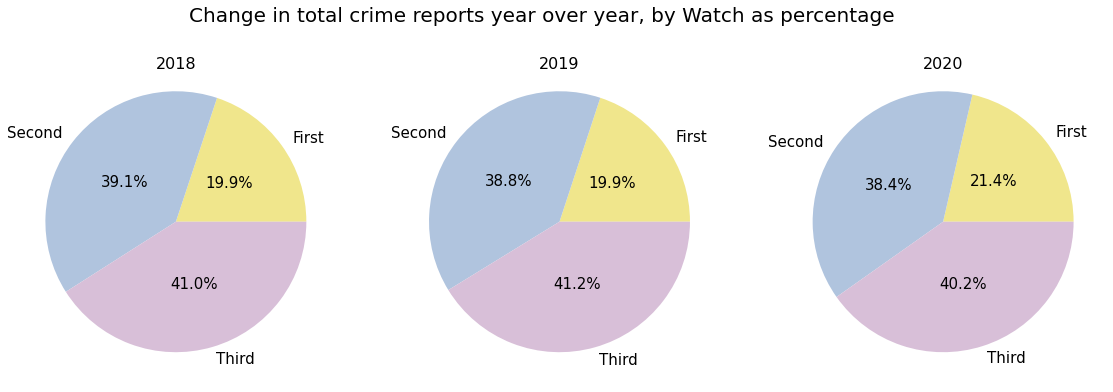

In [344]:
f, axes = plt.subplots(1,3, figsize=(20, 6))
f.subplots_adjust(wspace=0.1, hspace=2)
f.suptitle('Change in total crime reports year over year, by Watch as percentage', y=1,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Watch]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Watch]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Watch]).count()

df_2018['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['khaki', 'lightsteelblue', 'thistle'], textprops = {'color':'k', 'size':'15'}, ax = axes[0])
df_2019['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['khaki', 'lightsteelblue', 'thistle'], textprops = {'color':'k', 'size':'15'}, ax = axes[1])
df_2020['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['khaki', 'lightsteelblue', 'thistle'], textprops = {'color':'k', 'size':'15'}, ax = axes[2])

axes[0].set_title('2018', y=0.95, fontsize=16)
axes[0].set_ylabel(None)
axes[1].set_title('2019', y=0.95, fontsize=16)
axes[1].set_ylabel(None)
axes[2].set_title('2020', y=0.95, fontsize=16)
axes[2].set_ylabel(None)

### Change in total crime reports year over year, by percentage of Arrests

Text(0, 0.5, '')

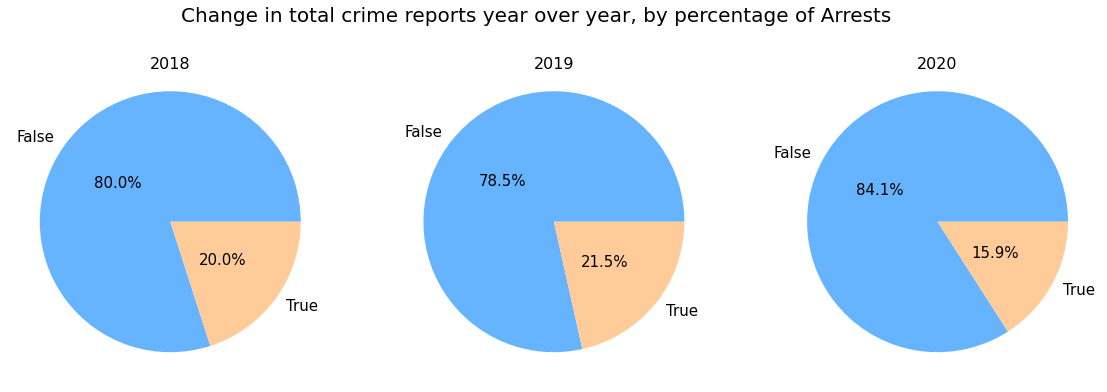

In [343]:
f, axes = plt.subplots(1,3, figsize=(20, 6))
f.subplots_adjust(wspace=0.1, hspace=2)
f.suptitle('Change in total crime reports year over year, by percentage of Arrests', y=1,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Arrest]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Arrest]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Arrest]).count()

df_2018['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#66b3ff', '#ffcc99'], textprops = {'color':'k', 'size':'15'}, ax = axes[0])
df_2019['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#66b3ff', '#ffcc99'], textprops = {'color':'k', 'size':'15'}, ax = axes[1])
df_2020['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#66b3ff', '#ffcc99'], textprops = {'color':'k', 'size':'15'}, ax = axes[2])

axes[0].set_title('2018', y=0.95, fontsize=16)
axes[0].set_ylabel(None)
axes[1].set_title('2019', y=0.95, fontsize=16)
axes[1].set_ylabel(None)
axes[2].set_title('2020', y=0.95, fontsize=16)
axes[2].set_ylabel(None)

### Change in total crime reports year over year, by percentage of domestic crimes

Text(0, 0.5, '')

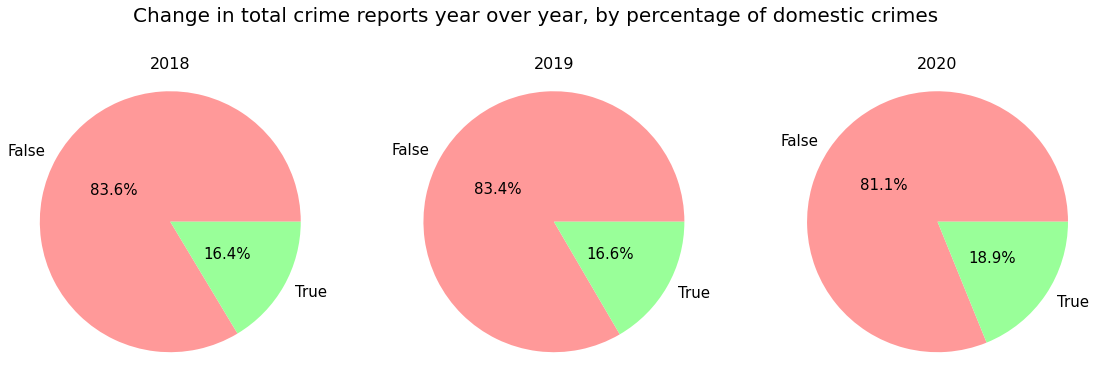

In [342]:
f, axes = plt.subplots(1,3, figsize=(20, 6))
f.subplots_adjust(wspace=0.1, hspace=2)
f.suptitle('Change in total crime reports year over year, by percentage of domestic crimes', y=1,  fontsize=20)

df_2018 = df[df['Year'] == 2018].groupby(by = [df.Domestic]).count()
df_2019 = df[df['Year'] == 2019].groupby(by = [df.Domestic]).count()
df_2020 = df[df['Year'] == 2020].groupby(by = [df.Domestic]).count()

df_2018['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#ff9999', '#99ff99'], textprops = {'color':'k', 'size':'15'}, ax = axes[0])
df_2019['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#ff9999', '#99ff99'], textprops = {'color':'k', 'size':'15'}, ax = axes[1])
df_2020['ID'].plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#ff9999', '#99ff99'], textprops = {'color':'k', 'size':'15'}, ax = axes[2])

axes[0].set_title('2018', y=0.95, fontsize=16)
axes[0].set_ylabel(None)
axes[1].set_title('2019', y=0.95, fontsize=16)
axes[1].set_ylabel(None)
axes[2].set_title('2020', y=0.95, fontsize=16)
axes[2].set_ylabel(None)

### Change in total crime reports year over year by percentage of serious of crime category

Text(0, 0.5, '')

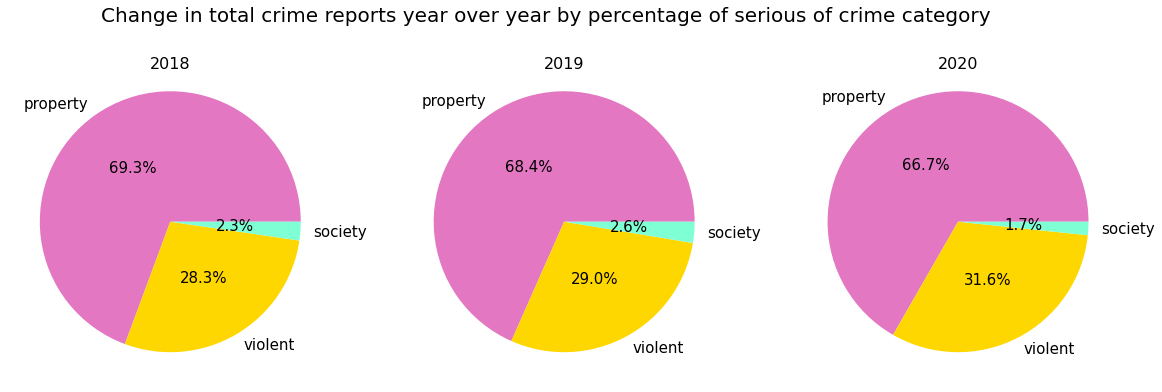

In [359]:
f, axes = plt.subplots(1,3, figsize=(20, 6))
f.subplots_adjust(wspace=0.2, hspace=2)
f.suptitle('Change in total crime reports year over year by percentage of serious of crime category', y=1,  fontsize=20)

df_2018 = df[df['Year'] == 2018][df['category_1'] == 'serious']['category_2'].value_counts()
df_2019 = df[df['Year'] == 2019][df['category_1'] == 'serious']['category_2'].value_counts()
df_2020 = df[df['Year'] == 2020][df['category_1'] == 'serious']['category_2'].value_counts()

df_2018.plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#e377c2', 'gold', 'aquamarine'], textprops = {'color':'k', 'size':'15'}, ax = axes[0])
df_2019.plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#e377c2', 'gold', 'aquamarine'], textprops = {'color':'k', 'size':'15'}, ax = axes[1])
df_2020.plot(kind='pie', autopct='%1.1f%%', pctdistance = 0.5, colors = ['#e377c2', 'gold', 'aquamarine'], textprops = {'color':'k', 'size':'15'}, ax = axes[2])

axes[0].set_title('2018', y=0.95, fontsize=16)
axes[0].set_ylabel(None)
axes[1].set_title('2019', y=0.95, fontsize=16)
axes[1].set_ylabel(None)
axes[2].set_title('2020', y=0.95, fontsize=16)
axes[2].set_ylabel(None)

In [ ]:
# Relevance of restaurants, bars, businesses et all as attributes (coefficients) 2020 vs 2019, 2018

# DONE

In [30]:
df.to_csv(r'C:/Users/dcarb/Documents/Quarter3/ml/Project/crime_df.csv', index = False)